
# **Convolutions, Blurring and Sharpening Images**

####**In this lesson we'll learn:**
1. Convolution Operations
2. Blurring
3. Denoising
4. Sharpening

In [1]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

# Download and unzip our images
!gdown --id 1O2uCujErifjvK1ziRGssaQO9khI15g6q
!unzip -qq images.zip

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1O2uCujErifjvK1ziRGssaQO9khI15g6q
From (redirected): https://drive.google.com/uc?id=1O2uCujErifjvK1ziRGssaQO9khI15g6q&confirm=t&uuid=e9143191-1bfe-4cd5-8b90-24a0e84c6bec
To: /content/images.zip
100% 29.6M/29.6M [00:00<00:00, 119MB/s]


### **Blurring using Convolutions**

In [3]:
import cv2
import numpy as np

image = cv2.imread('images/flowers.jpeg')
imshow('Original Image', image)

# Creating our 3 x 3 kernel
kernel_3x3 = np.ones((3, 3), np.float32) / 9

# We use the cv2.fitler2D to conovlve the kernal with an image
blurred = cv2.filter2D(image, -1, kernel_3x3)
imshow('3x3 Kernel Blurring', blurred)

# Creating our 7 x 7 kernel
kernel_7x7 = np.ones((7, 7), np.float32) / 49

blurred2 = cv2.filter2D(image, -1, kernel_7x7)
imshow('7x7 Kernel Blurring', blurred2)

Output hidden; open in https://colab.research.google.com to view.

### **Other commonly used blurring methods in OpenCV**
- Regular Blurring
- Gaussian Blurring
- Median Blurring

### **OpenCV에서 일반적으로 사용되는 기타 블러링 방법**
- 일반 블러링
- 가우시안 블러링
- 중앙값 블러링

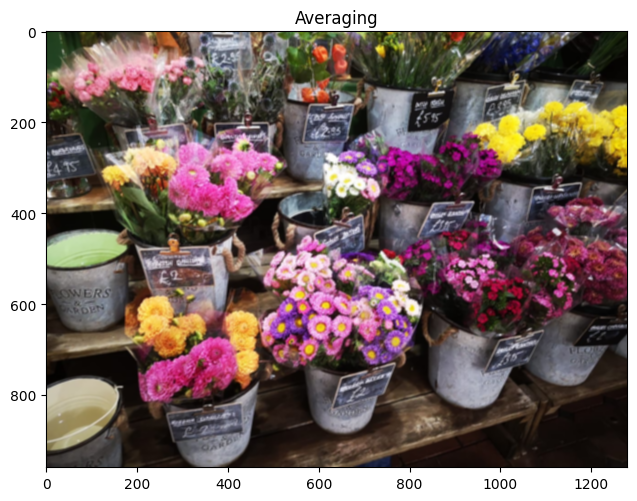

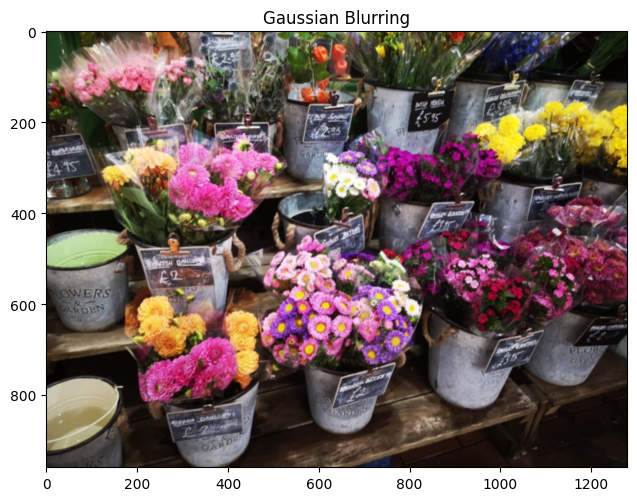

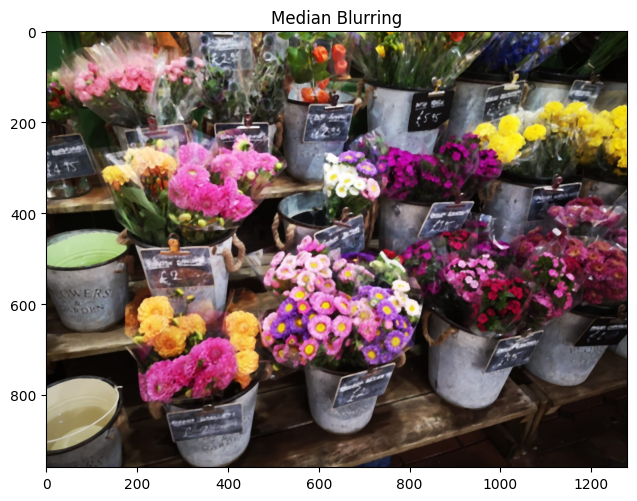

In [4]:
import cv2
import numpy as np

image = cv2.imread('images/flowers.jpeg')

# 정규화된 상자 필터로 영상을 컨볼루션하여 평균화합니다.
# 이것은 상자 아래의 픽셀을 가져가고 중심 요소를 대체합니다
# 상자 크기는 홀수 및 양수여야 합니다
blur = cv2.blur(image, (5,5))
imshow('Averaging', blur)

# 박스 필터 대신 가우시안 커널
Gaussian = cv2.GaussianBlur(image, (5,5), 0)
imshow('Gaussian Blurring', Gaussian)

# 커널 영역 및 중앙 아래의 모든 픽셀의 중앙값을 가져옵니다
# 요소가 이 중앙값으로 대체됩니다
median = cv2.medianBlur(image, 5)
imshow('Median Blurring', median)

### **쌍방향 필터**
#### '''dst = cv.bilateral Filter(src, d, sigmaColor, sigmaSpace[, dst[, borderType])'''
- **src** 소스 8비트 또는 부동 소수점, 1채널 또는 3채널 이미지.
- **dst** src와 동일한 크기 및 유형의 대상 이미지입니다.
- **d** 필터링시 사용되는 각 픽셀근접의 직경입니다. 양성이 아닌 경우 sigmaSpace에서 계산됩니다.
- **sigmaColor** 색 공간에서 sigma를 필터링합니다. 매개변수의 값이 클수록 픽셀 이웃(sigmaSpace 참조) 내의 더 먼 색이 함께 혼합되어 반동색의 영역이 더 커집니다.
- **sigmaSpace** 좌표 공간에서 sigma를 필터링합니다. 매개변수 값이 클수록 색상이 충분히 가깝기만 하면 더 먼 픽셀이 서로 영향을 미친다는 것을 의미합니다(sigmaColor 참조). d>0일 때 sigmaSpace에 관계없이 이웃 크기를 지정합니다. 그렇지 않으면 d는 sigmaSpace에 비례합니다.
- **borderType** 이미지 외부의 픽셀을 추정하는 데 사용되는 경계 모드

### **Bilateral Filter**
#### ```dst = cv.bilateralFilter(src, d, sigmaColor, sigmaSpace[, dst[, borderType]])```
- **src**	Source 8-bit or floating-point, 1-channel or 3-channel image.
- **dst**	Destination image of the same size and type as src .
- **d**	Diameter of each pixel neighborhood that is used during filtering. If it is non-positive, it is computed from sigmaSpace.
- **sigmaColor**	Filter sigma in the color space. A larger value of the parameter means that farther colors within the pixel neighborhood (see sigmaSpace) will be mixed together, resulting in larger areas of semi-equal color.
- **sigmaSpace**	Filter sigma in the coordinate space. A larger value of the parameter means that farther pixels will influence each other as long as their colors are close enough (see sigmaColor ). When d>0, it specifies the neighborhood size regardless of sigmaSpace. Otherwise, d is proportional to sigmaSpace.
- **borderType**	border mode used to extrapolate pixels outside of the image

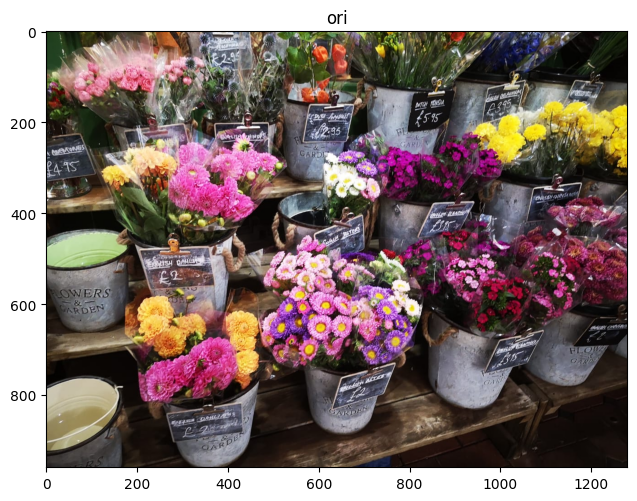

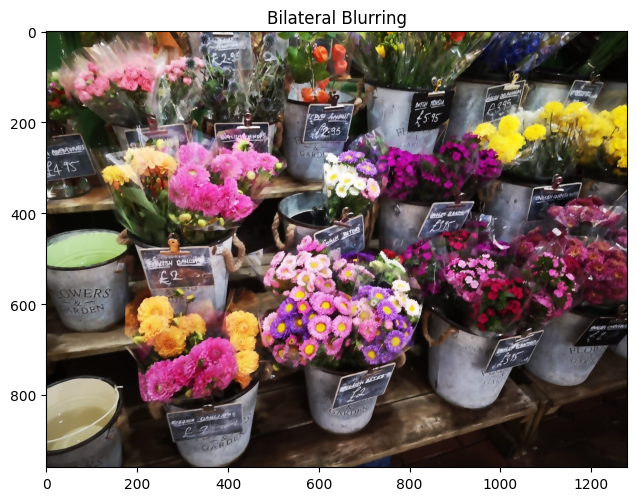

In [6]:
# Bilateral is very effective in noise removal while keeping edges sharp
bilateral = cv2.bilateralFilter(image, 9, 75, 75)

imshow('ori', image)
imshow('Bilateral Blurring', bilateral)

## **Image De-noising - Non-Local Means Denoising**

**There are 4 variations of Non-Local Means Denoising:**

- cv2.fastNlMeansDenoising() - works with a single grayscale images
- cv2.fastNlMeansDenoisingColored() - works with a color image.
- cv2.fastNlMeansDenoisingMulti() - works with image sequence captured in short period of time (grayscale images)
- cv2.fastNlMeansDenoisingColoredMulti() - same as above, but for color images.

```fastNlMeansDenoisingColored(InputArray src, OutputArray dst, float h=3, float hColor=3, int templateWindowSize=7, int searchWindowSize=21 )¶```

#### Parameters for fastNlMeansDenoisingColored:

- **src** – Input 8-bit 3-channel image.
- **dst** – Output image with the same size and type as src .
templateWindowSize – Size in pixels of the template patch that is used to compute weights. Should be odd. Recommended value 7 pixels
- **searchWindowSize** – Size in pixels of the window that is used to compute weighted average for given pixel. Should be odd. Affect performance linearly: greater searchWindowsSize - greater denoising time. Recommended value 21 pixels
- **h** – Parameter regulating filter strength for luminance component. Bigger h value perfectly removes noise but also removes image details, smaller h value preserves details but also preserves some noise
- **hColor** – The same as h but for color components. For most images value equals 10 will be enought to remove colored noise and do not distort colors

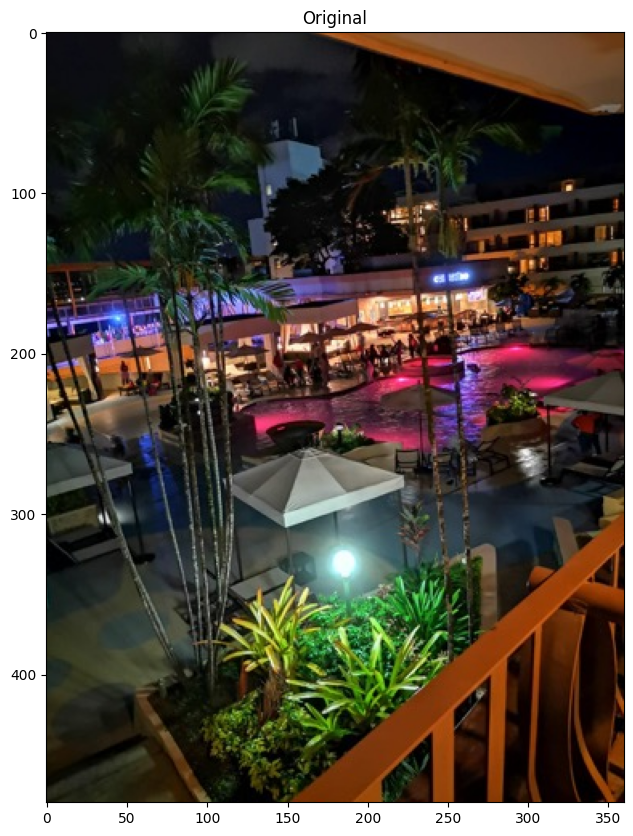

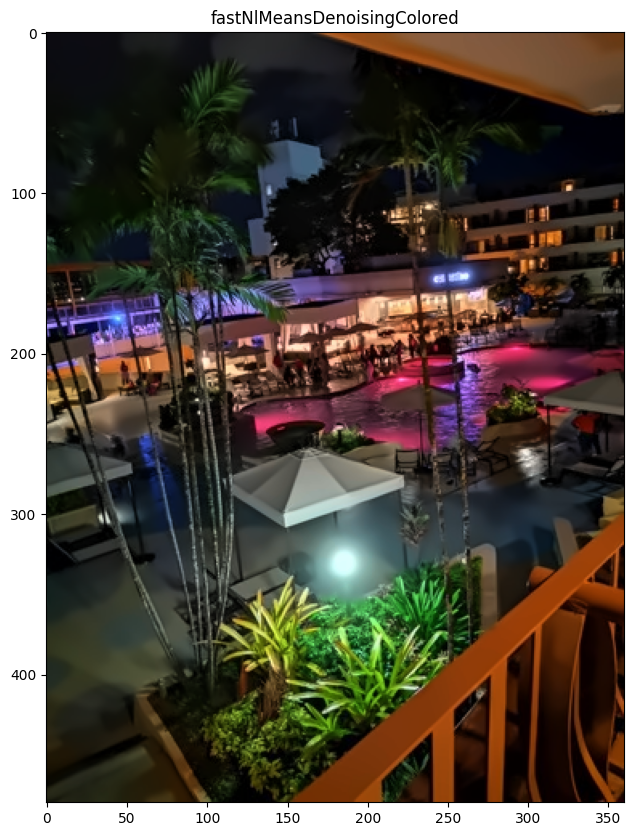

In [7]:
image = cv2.imread('images/hilton.jpeg')
imshow('Original', image)

dst = cv2.fastNlMeansDenoisingColored(image, None, 6, 6, 7, 21)
imshow('fastNlMeansDenoisingColored', dst)

### **Sharpening Images**

In [8]:
# Loading our image
image = cv2.imread('images/hilton.jpeg')
imshow('Original', image)

# Create our shapening kernel, remember it must sum to one
kernel_sharpening = np.array([[-1,-1,-1],
                              [-1, 9,-1],
                              [-1,-1,-1]])

# applying the sharpening kernel to the image
sharpened = cv2.filter2D(image, -1, kernel_sharpening)
imshow('Sharpened Image', sharpened)

Output hidden; open in https://colab.research.google.com to view.